In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

IRSEM = pd.read_csv('../data/IRSEM_Results.csv')
URSSI = pd.read_csv('../data/URSSI_survey_anonymized20210930.csv')
    
# Note that there are two rows after the header that are used for question labeling

• Remove empty columns & rows

• Test loading results based on question numbers

• Make bar graphs for each question in set, divide by section

QUESTION FORMAT: Qa.b_c where a is the section (starting at 0), b is the question, and c is the subquestion

note some Qa.b.d_c - might need to rename/fix 

• summarize results from text inputs - them

• old survey - probably direct counts on the graphs

• my survey - do comparison bar graphs out of 100%

t test data

In [ ]:
# function: print the answer counts and percentage for a given question
"""def print_question(question="Q0.1", survey = 0, percentages = True):
    if (survey == 0 or survey == 1):
        print("IRSEM: \nCounts: ", 
              IRSEM[question][2:].value_counts().to_string(),
              ( "\n-----\nPercentages: " + 
                IRSEM[question][2:].value_counts(normalize=True).to_string()) if percentages else "", 
              "\n")
    if (survey == 0): print("- - - - -\n")
    if (survey == 0 or survey == 2):
        print("URSSI: \nCounts: ", 
              URSSI[question][2:].value_counts().to_string(),
              ( "\n-----\nPercentages: " + 
                URSSI[question][2:].value_counts(normalize=True).to_string()) if percentages else "", 
              "\n")
"""
# print v2 uses dataframe concatination instead of raw value counts
def print_question(question="Q0.1", survey = 0, percentages = True):
    if (survey == 0 or survey == 1):
        questions = IRSEM[question][2:]
        if (percentages):
            df = pd.concat([questions.value_counts(), 
                            questions.value_counts(normalize=True)], 
                            axis = 1, keys=["count", "percentage"])
        else:
            df = pd.concat([questions.value_counts()], axis = 1, keys=["count"])
        print ("IRSEM: \n", df)

    if (survey == 0): print("\n - - - - -\n")

    if (survey == 0 or survey == 2):
        questions = URSSI[question][2:]
        if (percentages):
            df = pd.concat([questions.value_counts(), 
                            questions.value_counts(normalize=True)], 
                            axis = 1, keys=["count", "percentage"])
        else:
            df = pd.concat([questions.value_counts()], axis = 1, keys=["count"])
        print ("URSSI: \n", df)

# print v3:
# slightly different labeling on survey questions causes too much visual clutter for this version to be more efficient.
"""def print_question(question="Q0.1", percentages = True):
    irsem = IRSEM[question][2:]
    urssi = URSSI[question][2:]
    if (percentages):
        df = pd.concat([irsem.value_counts(), 
                        irsem.value_counts(normalize=True), 
                        urssi.value_counts(), 
                        urssi.value_counts(normalize=True)], 
                        axis = 1, keys=["IRSEM: counts", 
                                        "percentages",
                                        "URSSI: counts", 
                                        "percentages"])
    else:
        df = pd.concat([irsem.value_counts(), 
                        urssi.value_counts()], 
                        axis = 1, keys=["IRSEM: counts", 
                                        "URSSI: percentages"])
    print (df)"""

print_question()

             IRSEM: counts  percentages  URSSI: counts  percentages
Q0.1                                                               
Combination             27     0.586957            544     0.491863
Researchers             15     0.326087            473     0.427667
Developers               4     0.086957             89     0.080470


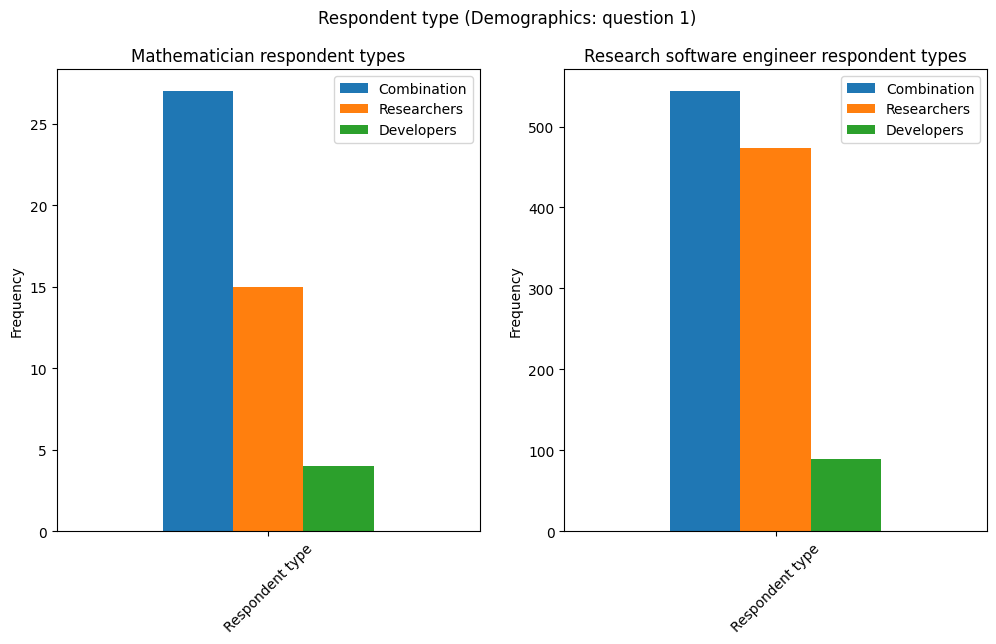

In [5]:
# function: find counts of each answer type on each question
def get_ans_counts(questions):
    ANSWERCOUNTS = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions, counts):
    totals = [0] * len(questions)
    for category in Answer_types:
        for q in range(len(questions)):
            totals[q] += counts[category][q]

    PERCENTAGES = {category: [] for category in Answer_types}
    i = 0
    for label, data in questions:
        for category in Answer_types:
            percent = data.value_counts().get(category, 0) * (1 / totals[i]) * 100
            PERCENTAGES[category].append(percent)
        i += 1
    #print(totals)
    return PERCENTAGES

# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Respondent type', survey["Q0.1"][2:])]

# possible text answers
Answer_types = [
    'Combination',
    'Researchers',
    'Developers']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_ans_counts(QUESTIONS), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_ans_counts(QUESTIONS), index=[label[0] for label in QUESTIONS])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Respondent type (Demographics: question 1)')

ax1 = df1.plot.bar(rot=0, ax=ax1)
ax1.set_title('Mathematician respondent types')
ax1.set_ylabel('Frequency')
ax1.tick_params('x',labelrotation=45)
#ax1.set_yticks(np.arange(0, 100.1, 10))

ax2 = df2.plot.bar(rot=0, ax=ax2)
ax2.set_title('Research software engineer respondent types')
ax2.set_ylabel('Frequency')
ax2.tick_params('x',labelrotation=45)
#ax2.set_yticks(np.arange(0, 100.1, 10))

# edit parameters
plt.gcf().set_size_inches(12, 6)
plt.show()

Attempting to recreate the boxplots

Figure 1: Where respondents spend software time.

In [ ]:
# Example data generation (replace with actual data)
np.random.seed(42)
data = {
    'Group': [],
    'Value': []
}

for group in range(10):  # Generates 10 groups to demo
    n = 50  # samples per group
    # Generate random values for the group
    data['Group'].extend([f'Group_{group+1}'] * n)
    data['Value'].extend(np.random.normal(group + 1, 0.3, n))

df = pd.DataFrame(data)

# Create a figure with a 5x2 grid of box plots (each cell has two subplots)
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
plt.tight_layout(pad=5)  # Adjust padding to prevent overlapping

# Iterate through each row in the grid
for i in range(5):
    for j in range(2):
        # Each cell contains two box plots side by side
        
        # First subplot (left)
        ax = axes[i, j]
        subset = df[df['Group'].str.contains(f'Group_{i+1}')]
        
        # Create the first box plot
        bp = subset.boxplot('Value', by='Group', 
                            positions=[0.5, 2.5],
                            widths=0.4,
                            patch_artist=True,
                            ax=ax)
        
        # Customization for the first box plot
        ax.set_title(f'Group {i+1} - Plot 1')
        ax.set_xlabel('Category')
        ax.set_ylabel('Value')
        ax.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        
        
        # Second subplot (right) within the same cell
        ax2 = ax.twinx()
        
        # Create the second box plot
        subset2 = df[df['Group'].str.contains(f'Group_{i+1}')]
        bp2 = subset2.boxplot('Value', by='Group',
                              positions=[1.5, 3.5],
                              widths=0.4,
                              patch_artist=True,
                              ax=ax2)
        
        # Customization for the second box plot
        ax2.set_title(f'Group {i+1} - Plot 2')
        ax2.set_xlabel('Category')
        ax2.set_ylabel('Value')
        ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        
# Adjust layout to prevent overlapping
#plt.tight_layout()
#plt.show()

[('Training: Time actually spent', 2       0
3       0
4       0
5       0
6       0
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13      5
14    NaN
15    NaN
16      0
17      0
18     10
19      0
20    NaN
21    NaN
22      0
23      0
24    NaN
25      0
26      0
27    NaN
28    NaN
29      1
30      0
31    NaN
32    NaN
33    NaN
34      0
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45      0
46      0
47      3
48      0
49    NaN
50      0
51    NaN
Name: Q1.2_9, dtype: object), ('Training: Time preferably spent', 2       0
3       0
4       0
5       0
6       0
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13      5
14    NaN
15    NaN
16      0
17      0
18     10
19      3
20    NaN
21    NaN
22      0
23      0
24    NaN
25      0
26      0
27    NaN
28    NaN
29      1
30      0
31    NaN
32    NaN
33    NaN
34      0
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN

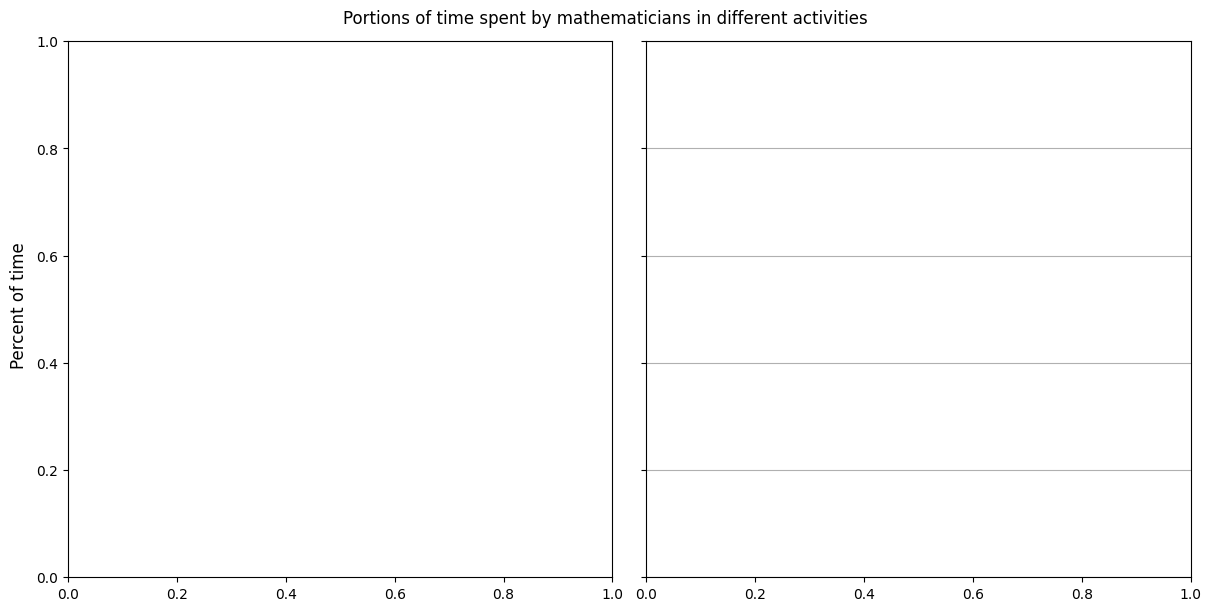

In [ ]:
"""
return [('Requirements gathering / documentation',  survey["Q1.2_1"][2:]), 
            ('Software architecture / design',          survey["Q1.2_2"][2:]), 
            ('Coding',                                  survey["Q1.2_3"][2:]), 
            ('Testing',                                 survey["Q1.2_4"][2:]), 
            ('Debugging',                               survey["Q1.2_5"][2:]), 
            ('Maintenance',                             survey["Q1.2_6"][2:]), 
            ('Documentation',                           survey["Q1.2_7"][2:]), 
            ('Meetings',                                survey["Q1.2_8"][2:]), 
            ('Training',                                survey["Q1.2_9"][2:]), 
            ('Other',                                   survey["Q1.2_10"][2:]), 

            ('Requirements gathering / documentation',  survey["Q1.3_1"][2:]), 
            ('Software architecture / design',          survey["Q1.3_2"][2:]), 
            ('Coding',                                  survey["Q1.3_3"][2:]), 
            ('Testing',                                 survey["Q1.3_4"][2:]), 
            ('Debugging',                               survey["Q1.3_5"][2:]), 
            ('Maintenance',                             survey["Q1.3_6"][2:]), 
            ('Documentation',                           survey["Q1.3_7"][2:]), 
            ('Meetings',                                survey["Q1.3_8"][2:]), 
            ('Training',                                survey["Q1.3_9"][2:]), 
            ('Other',                                   survey["Q1.3_10"][2:])]
"""

# select question / question segments from the given survey
#
# Here, the idea is that we are going to be comparing two sets of results on these questions. 
# "Q1.2_1" - "Q1.2_10" and "Q1.3_1" - "Q1.3_10" 
def set_questions(survey):
    return [('Training: Time actually spent',   survey["Q1.2_9"][2:]), 
            ('Training: Time preferably spent', survey["Q1.3_9"][2:])]

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(QUESTIONS, index=[label[0] for label in QUESTIONS])


fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, layout='constrained')
fig.suptitle('Portions of time spent by mathematicians in different activities')
#for ax in axs.flat:
#fig.subplots_adjust(hspace=0)

#ax1 = df1.plot(kind='box', title='a')

print (QUESTIONS)

ax2.set_title('')

fig.supylabel('Percent of time')
plt.grid(visible=None, which='both', axis='y')


plt.gcf().set_size_inches(12, 6)
plt.show()



Figure 3: Use of testing (Question 1.4)

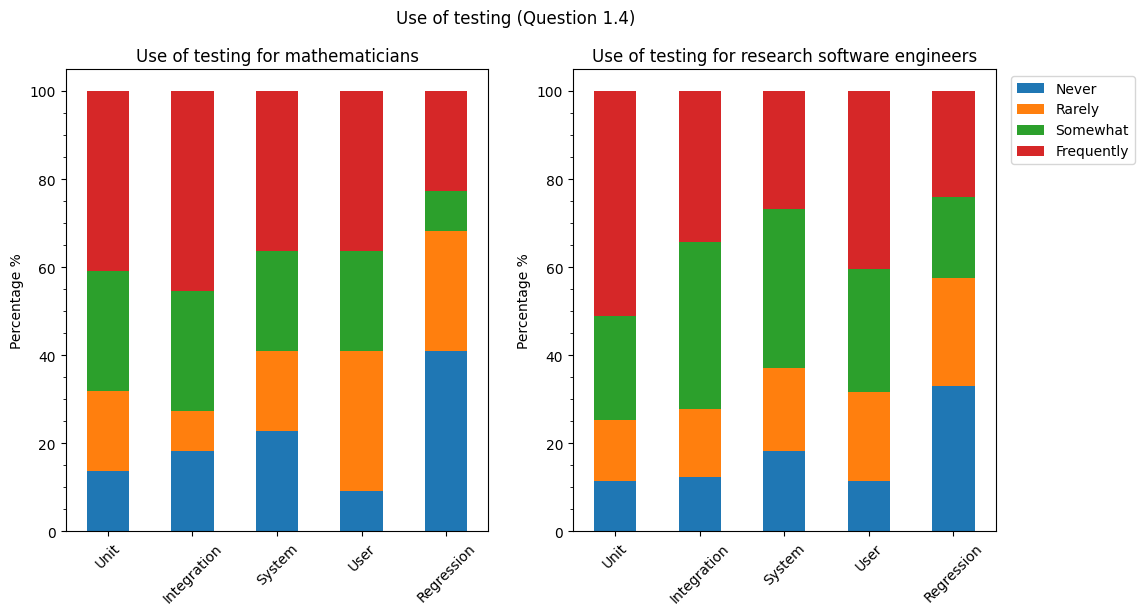

In [ ]:
# function: find counts of each answer type on each question
def get_ans_counts(questions):
    ANSWERCOUNTS = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions, counts):
    totals = [0] * len(questions)
    for category in Answer_types:
        for q in range(len(questions)):
            totals[q] += counts[category][q]

    PERCENTAGES = {category: [] for category in Answer_types}
    i = 0
    for label, data in questions:
        for category in Answer_types:
            percent = data.value_counts(normalize=True).get(category, 0) * 100
            PERCENTAGES[category].append(percent)
        i += 1
    #print(totals)
    return PERCENTAGES

# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Unit',            survey["Q1.4_1"][2:]), 
            ('Integration',     survey["Q1.4_2"][2:]), 
            ('System',          survey["Q1.4_3"][2:]), 
            ('User',            survey["Q1.4_4"][2:]), 
            ('Regression',      survey["Q1.4_5"][2:])]

# possible text answers
Answer_types = [
    'Never',
    'Rarely',
    'Somewhat',
    'Frequently']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Use of testing (Question 1.4)')

ax1 = df1.plot.bar(rot=0, ax=ax1, stacked = True)
ax1.set_title('Use of testing for mathematicians')
ax1.set_ylabel('Percentage %')
ax1.tick_params('x',labelrotation=45)
ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)
ax1.get_legend().remove()

ax2 = df2.plot.bar(rot=0, ax=ax2, stacked = True)
ax2.set_title('Use of testing for research software engineers')
ax2.set_ylabel('Percentage %')
ax2.tick_params('x',labelrotation=45)
ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

# edit parameters
plt.legend(bbox_to_anchor=(1.02, 1))
plt.gcf().set_size_inches(12, 6)
plt.show()

Figure 4: Availability of tool support. (Question 2.2)

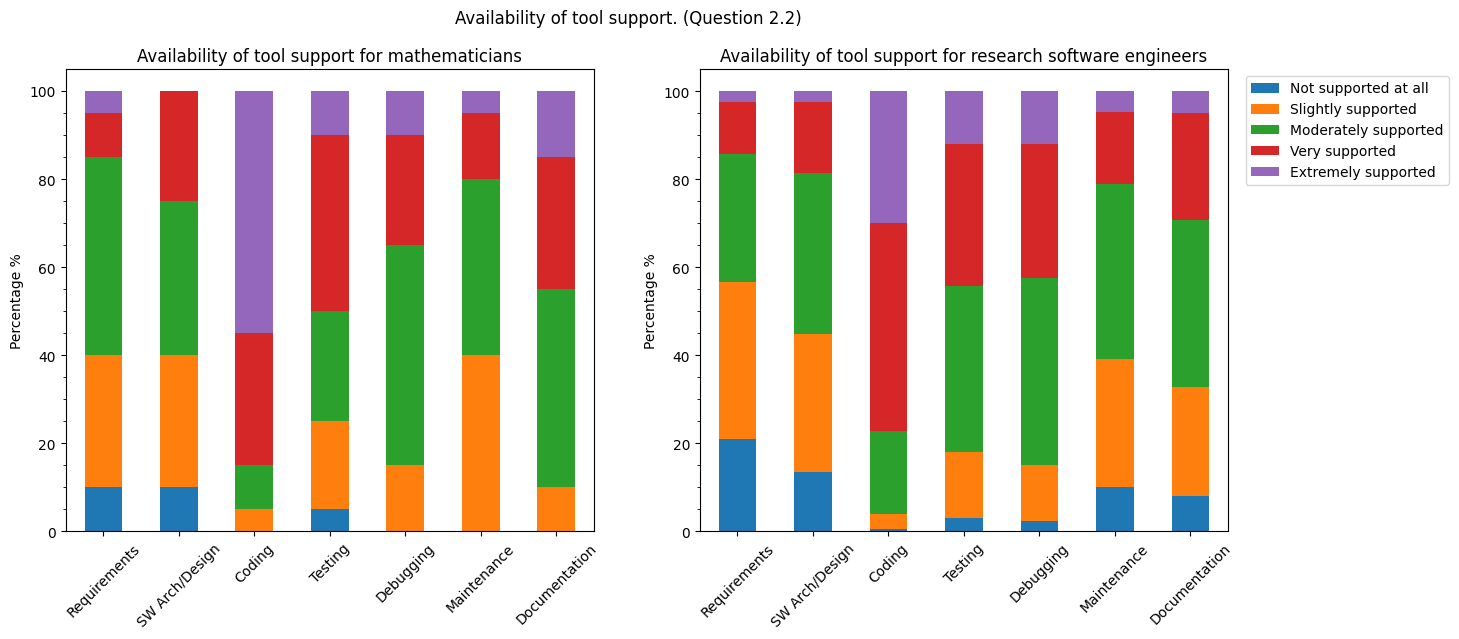

In [ ]:

# function: find counts of each answer type on each question
def get_ans_counts(questions):
    ANSWERCOUNTS = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions):

    PERCENTAGES = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            percent = data.value_counts(normalize=True).get(category, 0) * 100
            PERCENTAGES[category].append(percent)
    #print(totals)
    return PERCENTAGES

# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Requirements',            survey["Q2.2_1"][2:]), 
            ('SW Arch/Design',          survey["Q2.2_2"][2:]), 
            ('Coding',                  survey["Q2.2_3"][2:]), 
            ('Testing',                 survey["Q2.2_4"][2:]), 
            ('Debugging',               survey["Q2.2_5"][2:]), 
            ('Maintenance',             survey["Q2.2_6"][2:]), 
            ('Documentation',           survey["Q2.2_7"][2:])]

# possible text answers
Answer_types = [
    'Not supported at all',
    'Slightly supported',
    'Moderately supported',
    'Very supported', 
    'Extremely supported']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_percentages(QUESTIONS), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_percentages(QUESTIONS), index=[label[0] for label in QUESTIONS])

# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Availability of tool support. (Question 2.2)')

ax1 = df1.plot.bar(rot=0, ax=ax1, stacked = True)
ax1.set_title('Availability of tool support for mathematicians')
ax1.set_ylabel('Percentage %')
ax1.tick_params('x',labelrotation=45)
ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)
ax1.get_legend().remove()

ax2 = df2.plot.bar(rot=0, ax=ax2, stacked = True)
ax2.set_title('Availability of tool support for research software engineers')
ax2.set_ylabel('')
ax2.tick_params('x',labelrotation=45)
ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

# edit parameters
#plt.grid(visible=None, which='both', axis='y')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.gcf().set_size_inches(15, 6)
plt.show()
